<img src="images/Proyecto1.jpg" />

 ### Correos
 - brayan2190040@correo.uis.edu.co
 - santiago2183223@correo.uis.edu.co
 

Historia
--------
El rompecabezas fue inventado por el matemático francés Édouard Lucas en 1883. Se cuenta una historia sobre un templo en la India en Kashi Vishwanath que contiene una gran sala con tres postes gastados por el tiempo, rodeada de 64 discos dorados. Los sacerdotes de Brahma, actuando bajo el mandato de una antigua profecía, han estado moviendo estos discos de acuerdo con las reglas inmutables de Brahma desde ese momento. Por lo tanto, el acertijo también se conoce como el rompecabezas de la Torre de Brahma. Según la leyenda, cuando se complete el último movimiento del rompecabezas, el mundo se terminará.2​ No está claro si Lucas inventó esta leyenda o si se inspiró en ella.

Si la leyenda fuera cierta, y si los sacerdotes pudieran mover los discos a una velocidad de uno por segundo, utilizando el menor número de movimientos, completar la tarea les llevaría 264 - 1 segundos, o aproximadamente 585.000 millones de años,3​ que es aproximadamente 42 veces la edad actual del Universo.

Existen muchas variaciones en esta leyenda. Por ejemplo, en algunos relatos el templo es un monasterio, y los sacerdotes son monjes. Se puede decir que el templo o monasterio se encuentra en diferentes partes del mundo, incluidos Hanói, Vietnam, y puede estar asociado con cualquier religión. En algunas versiones, se introducen otros elementos, como el hecho de que la torre fue creada en el comienzo del mundo, o que los sacerdotes o monjes solo pueden hacer un movimiento por día.

Reglas del Juego 
--------
Para crear un automata que siguiera la solucion, se tuvo en cuenta tres reglas que rigen una torre de Hanoi.

1. Solo se puede mover un disco cada vez y para mover otro los demás tienen que estar en postes.
2. Un disco de mayor tamaño no puede estar sobre uno más pequeño que él mismo.
3. Solo se puede desplazar el disco que se encuentre arriba en cada poste.

<img src="images/Muestra.gif" />

Resolucion del problema para sus movimientos.
--------
Para la resolucion se debe observar que para mover N discos desde una barra a otra se tiene que mover N-1 discos a otra barra auxiliar y luego mover el el N-simo disco a la barra objetivo, luego mover otra vez N-1 discos a la barra objetivo, entonces teniendo en cuenta esto se puede derivar un comportamiento recursivo.

N = numero de discos en la barra. 

Mover N-1 discos a una barra auxiliar (movimientos) = N-1.
Mover el N-simo disco a la barra objetivo (movimientos) = [N-1] + 1
Mover otra vez N-1 discos a la barra auxiliar (movimients) = [N-1] + 1 + [N-1]

Entonces el minimo numero de movimientos (MV) esta dado como:

MV = 2N-1.

 Diagrama de transiciones del Automata
 --------

<img src="images/DIAGRAMAAFD.jpg" />

# Codigo del proyecto.

Para la implementacion del codigo en el proyecto, se uso como modelo principal un AFD ( Automata Finito Determinista) para su solucion, utilizando la libreria [automatalib] de la cual se usaron previas funciones de esta =>

In [75]:
from automatalib.fa.dfa import DFA 

Para el tratamiento y organizacion de los datos se usaron las siguientes letras como representacion de las barras:

- A = Barra inicial de la Torre donde se encuentran los discos al inicio.
- B = Barra media de la Torre que se usa como auxiliar.
- C = Barra final u objetivo a la cual se mueven los discos.

Ademas se debe tener en cuenta que el algortimo muestra de manera textual el avance del juego como por ejemplo:

- 123A significa que los discos 1 2 y 3 se encuentran en la barra A.
- 1A23B significa que el disco 1 esta en la barra A y los discos 2 y 3 en la barra B.
- 12A3C significa que el disco 3 se encuentra en la barra C y los discos 1 y 2 en la barra A.

De modo que hace el algoritmo mas intuitivo para quien lo use.

##### NOTA:tambien de debe tener en cuenta las reglas para resolver el juego

## Reglas para el uso del Algoritmo.
Como tal el programa solo recibe como entradas ciertas letras las cuales representan los movimientos para mover los discos:

###### D -> Mover 1 a la barra A
###### E -> Mover 1 a la barra B
###### F -> Mover 1 a la barra C
###### G -> Mover 2 a la barra A
###### H -> Mover 2 a la barra B
######  I -> Mover 2 a la barra C
###### J -> Mover 3 a la barra A
###### K -> Mover 3 a la barra B
###### L -> Mover 3 a la barra C
###### M -> Mover 4 a la barra A
###### N -> Mover 4 a la barra B
###### O -> Mover 4 a la barra C

### Siendo 1 2 3 y 4, los discos en la Torre de Hanoi.


- Automata Finito Determinista usado en el proyecto.

In [76]:
dfaHanoi = DFA(
    states={'123A', '23A1B', '23A1C', '3A1B2C','13A2C', '13A2B', '3A2B1C', '3A12C',
           '3A12B', '3B12C', '13B2C', '2A13B','12A3B', '12A3C', '2A13C', '2B13C',
           '12B3C', '1A3B2C', '2A3B1C', '2A1B3C','1A2B3C', '1A23B', '23B1C',
           '1B23C', '1A23C','123B4C', '123B','123C','4B123C'},
    input_symbols={'d', 'e','f','g', 'h','i','j', 'k','l','m', 'n','o'},
    transitions={
        '123A': {'e': '23A1B', 'f': '23A1C'},
        '23A1B': {'d': '123A', 'i': '3A1B2C','f': '23A1C'},
        '23A1C': {'d': '123A', 'e': '23A1B','h': '3A2B1C'},
        '3A1B2C': {'d': '13A2C', 'g': '23A1B','f': '3A12C'},
        '13A2C': {'h': '13A2B', 'e': '3A1B2C','f': '3A12C'},
        '13A2B': {'i': '13A2C', 'e': '3A12B','f': '3A2B1C'},
        '3A2B1C': {'d': '13A2B', 'e': '3A12B','g': '23A1C'},
        '3A12C': {'e': '3A1B2C', 'd': '13A2C','k': '3B12C'},
        '3A12B': {'d': '13A2B', 'l': '12B3C','f': '3A2B1C'},
        '3B12C': {'d': '1A3B2C', 'e': '13B2C','j': '3A12C'},
        '13B2C': {'f': '3B12C', 'd': '1A3B2C','g': '2A13B'},
        '2A13B': {'d': '12A3B', 'f': '2A3B1C','i': '13B2C'},
        '12A3B': {'e': '2A13B', 'f': '2A3B1C','l': '12A3C'},
        '12A3C': {'k': '12A3B', 'e': '2A1B3C','f': '2A13C'},
        '2A13C': {'d': '12A3C', 'h': '2B13C','e': '2A1B3C'},
        '2B13C': {'g': '2A13C', 'd': '1A2B3C','e': '12B3C'},
        '12B3C': {'j': '3A12B', 'd': '1A2B3C','f': '2B13C'},
        '1A3B2C': {'h': '1A23B', 'e': '13B2C','f': '3B12C'},
        '2A3B1C': {'d': '12A3B', 'h': '23B1C','e': '2A13B'},
        '2A1B3C': {'d': '12A3C', 'f': '2A13C','i': '1B23C'},
        '1A2B3C': {'e': '12B3C', 'i': '1A23C','f': '2B13C'},
        '1A23B': {'i': '1A3B2C', 'f': '23B1C','e': '123B'},
        '23B1C': {'e': '123B', 'g': '2A3B1C','d': '1A23B'},
        '1B23C': {'f': '123C', 'g': '2A1B3C','d': '1A23C'},
        '1A23C': {'h': '1A2B3C', 'e': '1B23C','f': '123C'},
        '123B4C': {'d': '1A23B', 'f': '23B1C','m': '123B'},
        '123B': {'f': '23B1C', 'o': '123B4C','d':'1A23B'},
        '123C': {'n': '4B123C', 'e': '1B23C','d': '1A23C'},
        '4B123C': {'e': '1B23C', 'm': '123C','d': '1A23C'}
        
    },
    initial_state='123A',
    final_states={'123C'}
)

In [ ]:

current_state = dfaHanoi.initial_state
Iterator = 1
print("\t\t\t\t\tBienvenido al Juego Torre de Hanoi\n\n")
try:
    discos=int(input("Ingrese el numero de Discos (3 o 4): "))
    MDefault = 0
    word = []
    if((discos == 3) or (discos==4)):

        while(Iterator == 1): 
            print("\t\t\t\t\t\t\t\t\t\t\tNumero de movimientos realizados: ", MDefault,"\n\n")
  
            if(current_state != "123C"):
                try:
                
                    Mov=input("Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => ").lower()

                    if(Mov=='x'):
                        print("\n\nHaz cerrado el juego, vuelve a jugar pronto :) ")
                        print("Estado de la torre: ",current_state)
                        Iterator = 0
                    else:
                        current_state = dfaHanoi._get_next_current_state(current_state,Mov)
                        print("Estado de la torre: ",current_state)
                        word.append(Mov)
                        MDefault+=1
                
                except Exception as e:
                    print("Ese movimiento no es valido, Revisa el manual de movimientos")
            else:
        
                print("Felicidades has completado la Torre con: ",MDefault," Movimientos ")
                Iterator=0;
        ;
 
        validade=''
        for i in range (len(word)) :
             validade += word[i]  
        print("\n Movimientos realizados: ",validade)
   
        if(discos == 4):
            current_state = current_state +'-4'
    
    else:
        print("Numero de discos No valido.")
    
except Exception as e:
    print("Entrada No Valida.")



					Bienvenido al Juego Torre de Hanoi


Ingrese el numero de Discos (3 o 4): 4
											Numero de movimientos realizados:  0 


Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => E
Estado de la torre:  23A1B
											Numero de movimientos realizados:  1 


Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => I
Estado de la torre:  3A1B2C
											Numero de movimientos realizados:  2 


Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => F
Estado de la torre:  3A12C
											Numero de movimientos realizados:  3 


Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => K
Estado de la torre:  3B12C
											Numero de movimientos realizados:  4 


Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => D
Estado de la torre:  1A3B2C
											Numero de movimientos realizados:  5 


Ingrese el movimiento que quiere realizar (x para finalizar el juego) : => 
Ese movimiento 

# Movimientos para cada disco en la cima de la Torre.

###### D -> Mover 1 a la barra A
###### E -> Mover 1 a la barra B
###### F -> Mover 1 a la barra C
###### G -> Mover 2 a la barra A
###### H -> Mover 2 a la barra B
######  I -> Mover 2 a la barra C
###### J -> Mover 3 a la barra A
###### K -> Mover 3 a la barra B
###### L -> Mover 3 a la barra C
###### M -> Mover 4 a la barra A
###### N -> Mover 4 a la barra B
###### O -> Mover 4 a la barra C

### Siendo 1 2 3 y 4, los discos en la Torre de Hanoi.

# Aqui puedes ver como quedo la torre 

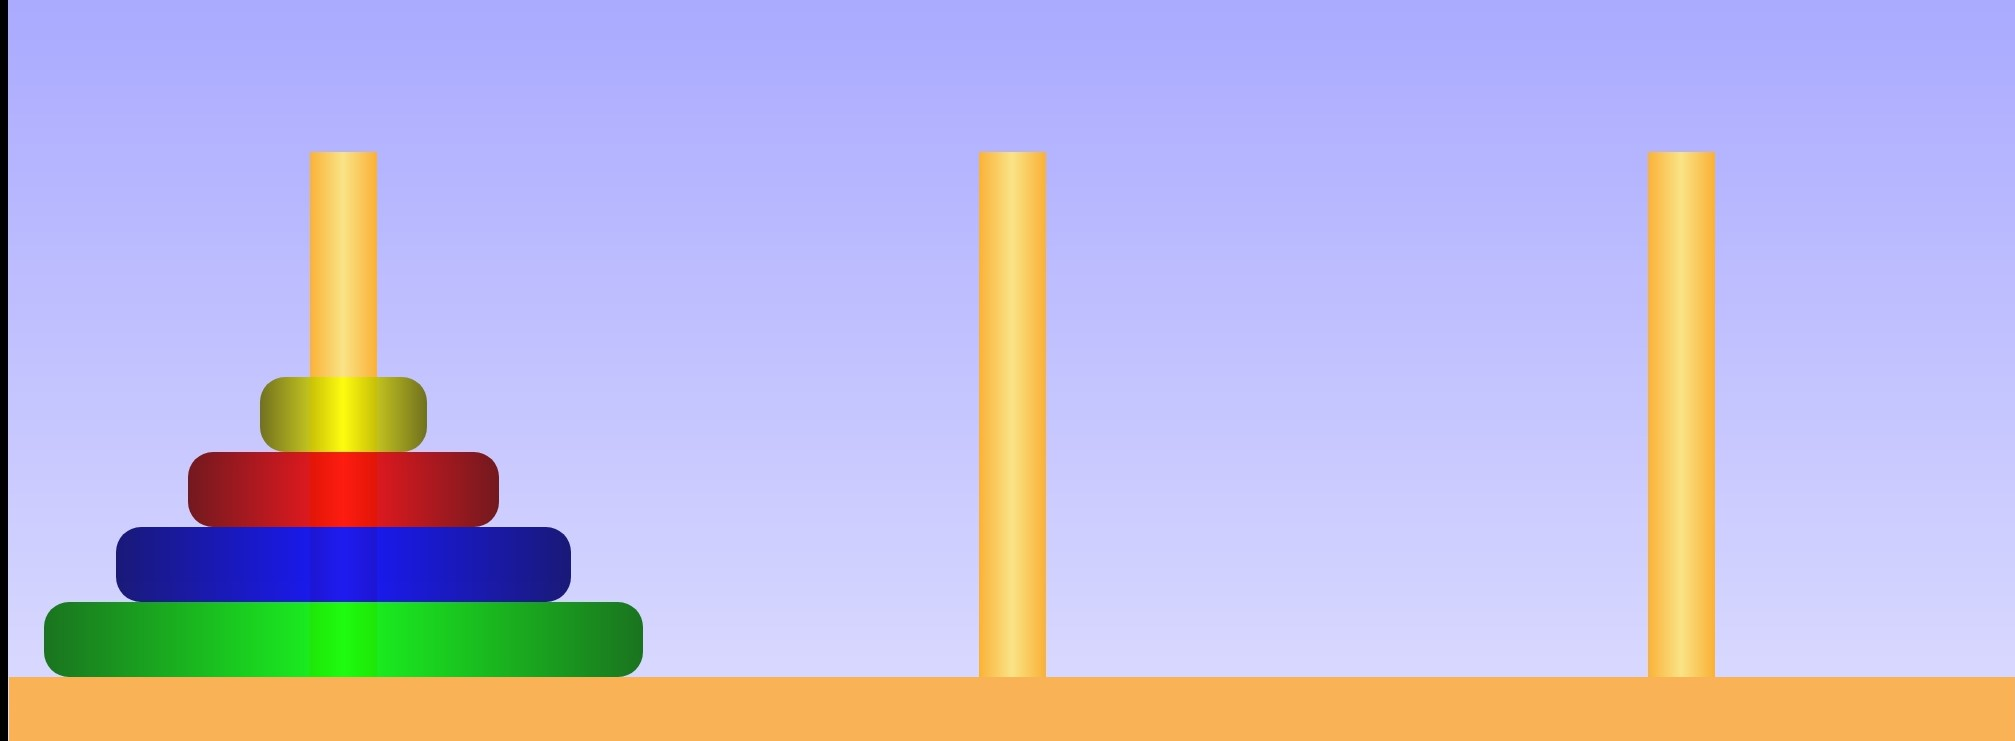

In [82]:
from IPython.display import Image
Image(filename='images/'+ current_state +'.jpg')

In [74]:
!chmod 777 empaquetar.sh run utils/*
codigo="PROYECTO HANOI"
!./empaquetar.sh $codigo

chmod: cannot access ‘run’: No such file or directory
chmod: cannot access ‘utils/*’: No such file or directory
¡PERFECTO!, el archivo   'PROYECTO.zip'   se creó correctamente :D
